In [1]:
import numpy as np
import pandas as pd

import os

'Hello'

# Load Data 

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
fake = pd.read_csv("/content/drive/MyDrive/Data/fake_news&news/Bản sao của Fake.csv")
fake.dropna(inplace=True)
fake.head(10)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [6]:
fake.count()

title      23481
text       23481
subject    23481
date       23481
dtype: int64

In [7]:
true = pd.read_csv("/content/drive/MyDrive/Data/fake_news&news/Bản sao của True.csv")
true.dropna(inplace=True)
true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [8]:
true.count()

title      21417
text       21417
subject    21417
date       21417
dtype: int64

In [9]:
# Combine DataFrames thêm mục classs(gán mác của tin tức 0:fake 1:True) + combine 2 Phần DATA lại thành 1 data chung là news

fake['class'] = np.zeros(fake.shape[0])
true['class'] = np.ones(true.shape[0])

news = pd.concat([fake, true])
news

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1.0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1.0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1.0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1.0


In [10]:
news.head(1)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0


# Feature Engineering

In [ ]:
#news['title_text'] = news['title'] + ' ' + news['text'] # gộp 2 mác title+text chung 
#news.drop(['title', 'text'], axis=1, inplace=True)#bỏ 2 cột title,text
#news

,subject,date,class,title_text
0,News,"December 31, 2017",0.0,Donald Trump Sends Out Embarrassing New Year’...
1,News,"December 31, 2017",0.0,Drunk Bragging Trump Staffer Started Russian ...
2,News,"December 30, 2017",0.0,Sheriff David Clarke Becomes An Internet Joke...
3,News,"December 29, 2017",0.0,Trump Is So Obsessed He Even Has Obama’s Name...
4,News,"December 25, 2017",0.0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
21412,worldnews,"August 22, 2017",1.0,'Fully committed' NATO backs new U.S. approach...
21413,worldnews,"August 22, 2017",1.0,LexisNexis withdrew two products from Chinese ...
21414,worldnews,"August 22, 2017",1.0,Minsk cultural hub becomes haven from authorit...
21415,worldnews,"August 22, 2017",1.0,Vatican upbeat on possibility of Pope Francis ...


In [11]:
news['title_text'] = news['title'] + ' ' + news['text']

In [40]:
news

,title,text,subject,date,class,title_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1.0,'Fully committed' NATO backs new U.S. approach...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1.0,LexisNexis withdrew two products from Chinese ...
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1.0,Minsk cultural hub becomes haven from authorit...
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1.0,Vatican upbeat on possibility of Pope Francis ...


Phân tách dữ liệu



Data title_text

In [13]:
A=news['title_text']
b=news['class']
b.values

array([0., 0., 0., ..., 1., 1., 1.])

Data title

In [ ]:
A=news['title']
b=news['class']
b.values

array([0., 0., 0., ..., 1., 1., 1.])

Data text

In [ ]:
A=news['text']
b=news['class']
b.values

array([0., 0., 0., ..., 1., 1., 1.])

Data title_text

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test_dev, y_train, y_test_dev = train_test_split(A, b,stratify=b.values ,test_size=0.20 ,random_state=42)
X_dev, X_test, y_dev, y_test=train_test_split(X_test_dev, y_test_dev,stratify=y_test_dev.values, test_size=0.50, random_state=42)

In [ ]:
X_train

14164    PARIS (Reuters) - French bank Societe Generale...
6909     WINSTON-SALEM, N.C. (Reuters) - North Carolina...
18191    Civil political discourse took a beating in We...
1903     (Reuters) - New York and Washington state on M...
9141     ORLANDO, Fla. (Reuters) - Orlando nightclub ki...
                               ...                        
9967     WFB  North Korea for the first time this week ...
3110     WASHINGTON (Reuters) - U.S. President Donald T...
8895     President Obama got real and raw with CNN s An...
18855    A producer at the Women in the World event had...
17711    BEIJING (Reuters) - China s top newspaper warn...
Name: text, Length: 35918, dtype: object

In [ ]:
X_test

4234     If Rudy Giuliani is going to continue bringing...
2618     When it comes to strategizing an offense again...
4987     WASHINGTON (Reuters) - President Donald Trump’...
3139     WASHINGTON (Reuters) - U.S. Representative Ste...
6968     This is awesome on so many levels it s hard to...
                               ...                        
20880    It appears that Obama ally, Angela Merkel is m...
18204    BARCELONA/MADRID (Reuters) - Spain s Constitut...
4145     Donald Trump is seriously stupid.Considering a...
8520     (Reuters) - Helen Delich Bentley, a former jou...
14119    Many Americans believe it s  racist  to keep m...
Name: text, Length: 4490, dtype: object

In [43]:
for i in range(len(b)):
    print("x_test",i,":",news['title_text'].to_numpy()[b.index[i]])

In [ ]:
y_test

4234     0.0
2618     0.0
4987     1.0
3139     1.0
6968     0.0
        ... 
20880    0.0
18204    1.0
4145     0.0
8520     1.0
14119    0.0
Name: class, Length: 4490, dtype: float64

## Bag of Words (chuẩn hóa dữ liệu)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z]+')

cv = CountVectorizer(
    lowercase=True, 
    stop_words='english', 
    ngram_range = (1,2), 
    tokenizer = token.tokenize,
    max_features=5000
)

Xcv_train = cv.fit_transform(X_train)
Xcv_dev = cv.transform(X_dev)
Xcv_test = cv.transform(X_test)
#biến chứa từ được chuẩn hóa

In [ ]:
cv.get_feature_names_out()

array(['abadi', 'abandoned', 'abc', ..., 'zones', 'zor', 'zuma'],
      dtype=object)

In [ ]:
print(text_counts)

In [ ]:
len(news)


44898

## Visualizations (Trực quan hóa dữ liệu bằng đồ thị tròn)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Pie(
            labels=['Fake', 'True'], 
            values=list(news['class'].value_counts()), 
            hole=0
        )
    ]
)

fig.update_layout(title="Fake and Real News Ratio")

fig.show()

# Feature Selection - chạy máy học logisticRegression

In [ ]:
#X = text_counts
#y = news['class']

In [ ]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=10000)

model.fit(Xcv_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

# Predictions đánh giá kết quả bằng các độ đo accuracy-score, f1-score, log-loss

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
y_pred = model.predict(Xcv_dev)

acc = accuracy_score(y_dev, y_pred)*100
f1 = f1_score(y_dev, y_pred)*100

print(f"(test) accuracy_score: {acc}")
print(f"(test) f1_score: {f1}")

(test) accuracy_score: 99.71046770601336
(test) f1_score: 99.69633263256247


In [ ]:
y_pred = model.predict(Xcv_test)

acc = accuracy_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100

print(f"(test) accuracy_score: {acc}")
print(f"(test) f1_score: {f1}")

(test) accuracy_score: 99.46547884187082
(test) f1_score: 99.4392523364486


# Confusion Matrix (ma trận kết quả)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



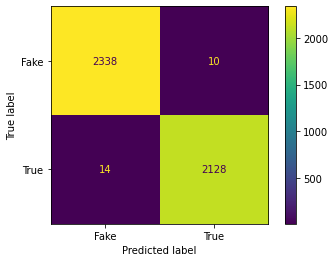

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model ,Xcv_test, y_test, display_labels=['Fake', 'True'],normalize=None,values_format='')

plt.grid(False)

plt.show()

In [ ]:
y_test

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train

array([1., 0., 1., ..., 1., 0., 0.])

In [ ]:
y_test[0]

0.0

In [ ]:
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

Show văn bản sai


Show kết quả Fakes bị đoán thành True news

In [ ]:
for i in range(len(y_pred)):
  if y_pred[i]==1 and y_pred[i]!=y_test.to_numpy()[i]:
    print("x_test",i,":",news['title_text'].to_numpy()[y_test.index[i]])

x_test 611 : RUDE! KAMALA HARRIS Repeatedly Cuts Off Homeland Security Secretary John Kelly Over Sanctuary City Policy [Video] RUDE, RUDE, RUDE! Secretary of Homeland Security John Kelly was repeatedly cut off by Senator Kamala Harris (D., Calif.) during questioning about the administration s sanctuary city policy. Harris cut Kelly off to say the administration was forcing cities into choosing between complying with federal law or forfeiting DHS counterterrorism funds. Had you not cut me off, I would have said the same thing you just said. Probably not as eloquently, but I would have said the same thing you just said,  Kelly said.Later, Kelly said he told city officials that whatever they do within the law,  we re willing to work with them. So So are you aware that there s local law enforcement  Harris started. Could you at least let me finish once, before you interrupt me?  Kelly said. Sir, with all due respect,  Harris responded. With all due respect, senator,  Kelly said.Harris aske

In [ ]:
news['title_text'].to_numpy()[y_test.index[611]]


'RUDE! KAMALA HARRIS Repeatedly Cuts Off Homeland Security Secretary John Kelly Over Sanctuary City Policy [Video] RUDE, RUDE, RUDE! Secretary of Homeland Security John Kelly was repeatedly cut off by Senator Kamala Harris (D., Calif.) during questioning about the administration s sanctuary city policy. Harris cut Kelly off to say the administration was forcing cities into choosing between complying with federal law or forfeiting DHS counterterrorism funds. Had you not cut me off, I would have said the same thing you just said. Probably not as eloquently, but I would have said the same thing you just said,  Kelly said.Later, Kelly said he told city officials that whatever they do within the law,  we re willing to work with them. So So are you aware that there s local law enforcement  Harris started. Could you at least let me finish once, before you interrupt me?  Kelly said. Sir, with all due respect,  Harris responded. With all due respect, senator,  Kelly said.Harris asked Kelly if t

In [ ]:
news['title'].to_numpy()[y_test.index[611]]

'RUDE! KAMALA HARRIS Repeatedly Cuts Off Homeland Security Secretary John Kelly Over Sanctuary City Policy [Video]'

In [ ]:
news['text'].to_numpy()[y_test.index[611]]

'RUDE, RUDE, RUDE! Secretary of Homeland Security John Kelly was repeatedly cut off by Senator Kamala Harris (D., Calif.) during questioning about the administration s sanctuary city policy. Harris cut Kelly off to say the administration was forcing cities into choosing between complying with federal law or forfeiting DHS counterterrorism funds. Had you not cut me off, I would have said the same thing you just said. Probably not as eloquently, but I would have said the same thing you just said,  Kelly said.Later, Kelly said he told city officials that whatever they do within the law,  we re willing to work with them. So So are you aware that there s local law enforcement  Harris started. Could you at least let me finish once, before you interrupt me?  Kelly said. Sir, with all due respect,  Harris responded. With all due respect, senator,  Kelly said.Harris asked Kelly if the administration was advising local enforcement leaders that they could overlook government requests on detainmen

# Classification Report báo cáo phân loại

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(Xcv_test)

print(classification_report(y_test, y_pred, target_names=['Fake', 'True'], zero_division=0))

              precision    recall  f1-score   support

        Fake       0.99      1.00      0.99      2348
        True       1.00      0.99      0.99      2142

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490



In [ ]:
text_counts

<44898x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 421953 stored elements in Compressed Sparse Row format>

## Relevant Features (1 số tính năng liên quan)

In [ ]:
top_features = {}

for col, coef in zip(cv.get_feature_names(), model.coef_[0]):
    if np.abs(coef) > 0.5:
        top_features[col] = coef

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
top_features

{'actors': -0.6074550713269087,
 'behalf': -0.5137917684685445,
 'breaking': -1.511994093315305,
 'breitbart': -0.5773000419506545,
 'breitbart news': -0.5404375321076991,
 'com': -0.5998757889878166,
 'destroy': -0.5055219622195865,
 'doing': -0.67728601704356,
 'embassy': -0.5249628150641066,
 'featured': -1.076765533075014,
 'featured image': -1.1618793830725282,
 'follow': -0.5758234428195471,
 'friday': 0.5481501693490956,
 'getty': -0.7833886619714343,
 'getty images': -0.7374490784593699,
 'gop': -0.731984027099052,
 'graphic': 1.0306727547304635,
 'hillary': -0.923056420950564,
 'image': -1.0065289043492853,
 'involved': -0.6140225343826609,
 'ipsos': -0.8994432374520251,
 'journalists': -0.7143026202941546,
 'just': -0.8505600025117607,
 'london': 0.599893440126591,
 'london reuters': 0.5740367239659133,
 'mail': -0.6296168446324866,
 'mohamed': -0.5051768898869826,
 'moscow reuters': 0.6914346316135499,
 'news': -0.6262595474333915,
 'news conference': 0.5128681978012571,
 'n

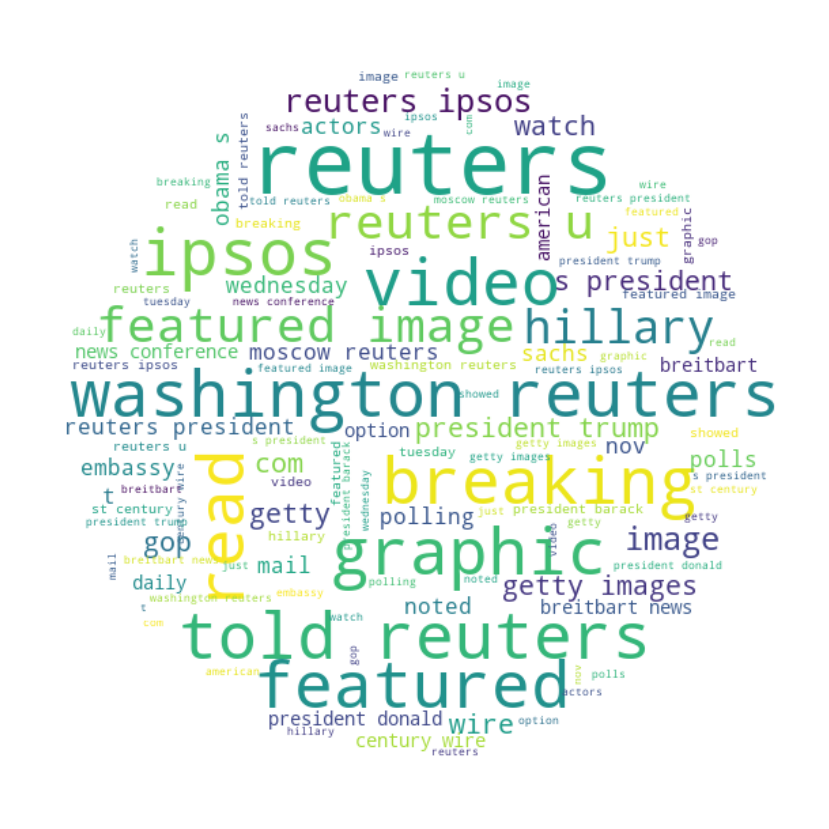

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask, scale=2)
wc.generate_from_frequencies(top_features)

plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

Twitter user

In [ ]:
import re
def count_twitters_user(df):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    list_ = []
    for text in df['text']:
        count += len(re.findall(twitter_username_re, text))
    return count

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

twitter_users_fake_count = count_twitters_user(fake)
twitter_users_true_count = count_twitters_user(true)
fig = go.Figure()
fig.add_trace(go.Bar(x=['Fake', 'True'],
    y=[twitter_users_fake_count, twitter_users_true_count],
    name='Twitter user name Pattern',
    marker_color='indianred')
)
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'unique hashtags mentions in twitters',
})
#fig = px.bar(y=[twitter_users_fake_count, twitter_users_true_count], x=['Fake', 'True'], title='Twitter user name Pattern')
fig.show()

In [ ]:
from tqdm import tqdm
def unique_tokens(df):
    unique_tokens = set()
    for text in tqdm(df['text']):
        splited = text.split()
        for token in splited:
            unique_tokens.add(token)
    return unique_tokens

unique_tokens_fake = unique_tokens(fake)
unique_tokens_true = unique_tokens(true)

100%|██████████| 21417/21417 [00:02<00:00, 7731.31it/s]


In [ ]:
#twitter_users_fake_count = count_twitters_user(fake)
#twitter_users_true_count = count_twitters_user(true)
fig = px.bar(y=[len(unique_tokens_fake), len(unique_tokens_true)], x=['Fake', 'True'], title='Unique tokens')
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

In [ ]:
!pip install pyenchant
!apt-get install libenchant1c2a -y

     |████████████████████████████████| 55 kB 1.9 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 

In [ ]:
import enchant
def check_if_exist(list_):
    d = enchant.DictWithPWL("en_US", "vocab.txt")
    count = 0
    for token in tqdm(list_):
        if not d.check(token) and not d.check(token.capitalize()):
            count+=1
    return count
count_fake = check_if_exist(unique_tokens_fake)
count_true = check_if_exist(unique_tokens_true)

100%|██████████| 178503/178503 [00:07<00:00, 24330.47it/s]


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[count_fake, len(unique_tokens_fake)-count_fake], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Fake News'), row=1, col=1)

fig.append_trace(go.Pie(values=[count_true, len(unique_tokens_true)-count_true], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Real News'), row=1, col=2)
fig.show()

In [ ]:
#for i in range(len(y_pred)):
 # if y_pred[i]==1 and y_pred[i]!=y_test.to_numpy()[i]:
  #  print("x_test",i,":",news['title_text'].to_numpy()[y_test.index[i]])

In [ ]:
#result = []
#for i in range(len(y_pred)):
 #   if 'reuters' in news['text'].to_numpy()[y_test.index[i]]:
  #      result.append(1)
   # else:
    #    result.append(0)
#accuracy_score(y_test, result)

0.5229398663697105